<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">CIC Working Group - Examining Virginia's Policy Decisions on the Covid Epidemic<br>
        <center>Using Sarimax Time Series Analysis and Elasticnet Multiple Regression</center></font>
        <br><left> Roland DePratti </left>
        <br><left> Central Connecticut State University</left>
        <br><left> Graduate School of Data Science</left>
    </b></p>
    </div>


<br><body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">CIC Working Group - Analyze The Pandemic Response Project</font>
    </b></p>
</div>
<br>    
<div class="container" style="display: flex; justify-content: space-between">
   <div class="image">
        <img src="images/CIC2.png" align="left" width="200" height="200" />
   </div>
   <div class="text">
        <p style="color: green;margin-left: 12px;margin-left: 40px;width: 650px;text-align: justify;border-width:3px; border-style:solid; border-color:black; padding: .5em;">The COVID Information Commons (CIC) Student Working Group has developed a new COVID-19 data science project for our members!
             Over the next nine weeks (February 4th - April 5th, 2024), Working
             Group members may participate in the below data science project, learning
             how to analyze government policy responses to the COVID-19 pandemic.
             We will use the extensive Oxford COVID-19 Government Response Tracker
             (OxCGRT) dataset (details below) to perform our analysis. Together, we
             will learn new skills, practice advanced quantitative and qualitative methods,
             and uncover evidence-based insights that illuminate effective strategies
             for future pandemics. The dataset's complexity offers immense potential to 
             identify and understand the most impactful policies in managing global health
             crises.</p>
   </div>
</div>
</body>

<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">The Relationship Between Covid Policies and Weekly Outcomes <br>New Cases, New Hospitalizations and New Deaths</font>
    </b></p>
</div>


In [96]:
# read Oxford subnational data and examine data types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

#path = 'E:/Jupyter/notebooks/CIC-Working-Group/data/'
path = 'data/'
fname2 = 'OxCGRT_compact_subnational_v1.csv'
full_name2 = path + fname2
Covid_subnat_df = pd.read_csv(full_name2,low_memory=False)
print('Covid_subnat_df: ',Covid_subnat_df.shape)
print(Covid_subnat_df.columns)
Covid_subnat_df[1:5]

Covid_subnat_df:  (239661, 58)
Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'CityName', 'CityCode', 'Jurisdiction', 'Date',
       'C1M_School.closing', 'C1M_Flag', 'C2M_Workplace.closing', 'C2M_Flag', 'C3M_Cancel.public.events', 'C3M_Flag',
       'C4M_Restrictions.on.gatherings', 'C4M_Flag', 'C5M_Close.public.transport', 'C5M_Flag',
       'C6M_Stay.at.home.requirements', 'C6M_Flag', 'C7M_Restrictions.on.internal.movement', 'C7M_Flag',
       'C8EV_International.travel.controls', 'E1_Income.support', 'E1_Flag', 'E2_Debt.contract.relief',
       'E3_Fiscal.measures', 'E4_International.support', 'H1_Public.information.campaigns', 'H1_Flag',
       'H2_Testing.policy', 'H3_Contact.tracing', 'H4_Emergency.investment.in.healthcare', 'H5_Investment.in.vaccines',
       'H6M_Facial.Coverings', 'H6M_Flag', 'H7_Vaccination.policy', 'H7_Flag', 'H8M_Protection.of.elderly.people',
       'H8M_Flag', 'V1_Vaccine.Prioritisation..summary.', 'V2A_Vaccine.Availability..summary.',


,CountryName,CountryCode,RegionName,RegionCode,CityName,CityCode,Jurisdiction,Date,C1M_School.closing,C1M_Flag,...,V3_Vaccine.Financial.Support..summary.,V4_Mandatory.Vaccination..summary.,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
1,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200102,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
2,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200103,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
3,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200104,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0
4,Australia,AUS,NaN,NaN,NaN,NaN,NAT_TOTAL,20200105,0,NaN,...,0,NaN,0.0,0.0,NV,0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Create Workable State Dataset
    </font>
    </b></p>
    <ol>
      <li>Convert Date string to Date Data type</li>
      <li>After Filtering to only US convert PopulationVaccinated to float</li>  
      <li>Filter only US State Data</li>
      <li>Select only Columns of Interest</li>
    </ol> 
</div>

In [97]:
# https://www.statology.org/pandas-check-if-column-contains-string/
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
Covid_subnat_df['PopulationVaccinated'] = Covid_subnat_df['PopulationVaccinated'].astype('str')
Covid_subnat_df['Date'] = Covid_subnat_df['Date'].astype('str')
Covid_subnat_df['Date'] = pd.to_datetime(Covid_subnat_df['Date'], format='%Y-%m-%d')
print(Covid_subnat_df['Date'].describe(datetime_is_numeric=True))

Covid_State_df = (Covid_subnat_df.loc[(Covid_subnat_df['Jurisdiction'] == 'STATE_TOTAL') &
                     (Covid_subnat_df['CountryName'].str.contains('United States'))])
Covid_State_df = (Covid_State_df.loc[:,['CountryName','RegionName','Jurisdiction','Date', 
                                        'C1M_School.closing', 'H6M_Facial.Coverings', 'H7_Vaccination.policy', 
                                        'ConfirmedCases', 'ConfirmedDeaths', 'MajorityVaccinated', 
                                        'PopulationVaccinated', 'StringencyIndex_Average', 
                                        'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average', 'EconomicSupportIndex']]) 
Covid_State_df.rename(columns={'RegionName': 'State',
                                'C1M_School.closing': 'C1M_School_Closing', 
                               'H6M_Facial.Coverings': "H6M_Facial_Coverings", 
                               "H7_Vaccination.policy": "H7_Vaccination_Policy"}, inplace=True)
Covid_State_df['PopulationVaccinated'] = Covid_State_df['PopulationVaccinated'].astype('float')
Covid_State_df.columns

count                           239661
mean     2021-07-05 21:46:26.961582848
min                2020-01-01 00:00:00
25%                2020-10-03 00:00:00
50%                2021-07-06 00:00:00
75%                2022-04-08 00:00:00
max                2023-02-28 00:00:00
Name: Date, dtype: object


Index(['CountryName', 'State', 'Jurisdiction', 'Date', 'C1M_School_Closing', 'H6M_Facial_Coverings',
       'H7_Vaccination_Policy', 'ConfirmedCases', 'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex'],
      dtype='object')

In [98]:
# Re-examine Values in PopulationVaccinated
# All US values are float
# 35% of rows have 0 as population vaccinated (all for data before 1/11/2022)
# Vaccines were available Dec. 11, 2020 (Pfizer-BioNTech) 16 years of age and older
# - Tose 12 through 15 years of age on May 10, 2021.
# It appears that collecting on this stat started on 1/11/2022. 
# Some states started reporting a day or two late. 

(Covid_State_df.groupby('PopulationVaccinated')
               .agg(Totals=('ConfirmedDeaths', 'size'))
               .sort_values('Totals', ascending=False))
rows_vac = len(Covid_State_df[Covid_State_df['PopulationVaccinated'] > 0])
all_rows = len(Covid_State_df)
print('totals:', all_rows, 'rows vac:', rows_vac, '% of pop vaccinbared > 0:', rows_vac/all_rows)
after_date = pd.to_datetime('2021-01-11')
print('zero after 1/11/21:', len(Covid_State_df[(Covid_State_df['PopulationVaccinated'] == 0) 
                                               & (Covid_State_df['Date'] > after_date)]))
(Covid_State_df[(Covid_State_df['PopulationVaccinated'] == 0) 
                  & (Covid_State_df['Date'] > after_date)]
               .groupby('State')
               .agg(Totals=('ConfirmedDeaths', 'size'))
               .sort_values('Totals', ascending=False))

totals: 55896 rows vac: 36649 % of pop vaccinbared > 0: 0.6556640904536998
zero after 1/11/21: 20


,Totals
State,
Hawaii,3
New Hampshire,3
Ohio,3
Vermont,3
Virginia,3
West Virginia,3
Arkansas,1
Washington DC,1


<div class="alert alert-block alert-info">
    <p>
    <b><font size="4">Generate New Columns with Daily Increments of Covid Cases and Deaths</font>
    </b></p>
</div>

In [99]:
# Generate new cases and deaths
# https://stackoverflow.com/questions/23142967/adding-a-column-thats-result-of-difference-in-consecutive-rows-in-pandas

def generate_new_cols(group):
    #print(type(frame))
    group['New_Cases'] = group['ConfirmedCases'] - group['ConfirmedCases'].shift(+1)
    group['New_Deaths'] = group['ConfirmedDeaths'] - group['ConfirmedDeaths'].shift(+1)
    group.iloc[0, group.columns.get_loc('New_Cases')] = 0
    group.iloc[0, group.columns.get_loc('New_Deaths')] = 0
    return group

Covid_State_df = Covid_State_df.groupby('State',group_keys=False).apply(generate_new_cols)

<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Display Cumulative and New Daily Numbers to Check for Accuracy</font>
    </b></p>
</div>

In [100]:
from pandasql import sqldf
sql1 = '''SELECT State, Date, ConfirmedCases, New_Cases, ConfirmedDeaths, New_Deaths
                 FROM Covid_State_df
                 WHERE Date between '2020-12-31' and '2021-01-05'
                 Order by State, Date;'''
#                 And State = 'Alaska';'''
print(sqldf(sql1)[0:5])
Covid_State_df.columns

     State                        Date  ConfirmedCases  New_Cases  ConfirmedDeaths  New_Deaths
0  Alabama  2020-12-31 00:00:00.000000        361226.0     4406.0           4827.0        53.0
1  Alabama  2021-01-01 00:00:00.000000        365747.0     4521.0           4872.0        45.0
2  Alabama  2021-01-02 00:00:00.000000        369458.0     3711.0           4872.0         0.0
3  Alabama  2021-01-03 00:00:00.000000        371934.0     2476.0           4873.0         1.0
4  Alabama  2021-01-04 00:00:00.000000        374095.0     2161.0           4878.0         5.0


Index(['CountryName', 'State', 'Jurisdiction', 'Date', 'C1M_School_Closing', 'H6M_Facial_Coverings',
       'H7_Vaccination_Policy', 'ConfirmedCases', 'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'New_Cases', 'New_Deaths'],
      dtype='object')

<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Examine Correlation Among Predictors and Responses</font>
    <br><br>The next two cells deomonstarte that there is a high correlation between the predictors
    <br>Therefore, I need to consider ML algorithms, like ElasticNet, to manage the multicollinearity      
    </b></p>
</div>

In [103]:
# This produces pearson for ordinal predictors
# Need to fit this into corr_matrix_with_pval
#also kendral is used for ordianl and can be called from pearsonr
# this may be better than below
from scipy.stats.contingency import association 
col_list = ['C1M_School_Closing', 'H6M_Facial_Coverings', 'H7_Vaccination_Policy']
for columna in col_list:
    for columnb in col_list:
        CrosstabResult = pd.crosstab(index=Covid_State_df[columna], columns=Covid_State_df[columnb])
        association_metric = association(CrosstabResult,method="pearson")
        print('Column_A', columna, 'Column_B',columnb, 'Association',association_metric)

Column_A C1M_School_Closing Column_B C1M_School_Closing Association 0.8660254037844386
Column_A C1M_School_Closing Column_B H6M_Facial_Coverings Association 0.5938804310102936
Column_A C1M_School_Closing Column_B H7_Vaccination_Policy Association 0.6301542415055467
Column_A H6M_Facial_Coverings Column_B C1M_School_Closing Association 0.5938804310102936
Column_A H6M_Facial_Coverings Column_B H6M_Facial_Coverings Association 0.8944271909999159
Column_A H6M_Facial_Coverings Column_B H7_Vaccination_Policy Association 0.5662150313678942
Column_A H7_Vaccination_Policy Column_B C1M_School_Closing Association 0.6301542415055467
Column_A H7_Vaccination_Policy Column_B H6M_Facial_Coverings Association 0.5662150313678942
Column_A H7_Vaccination_Policy Column_B H7_Vaccination_Policy Association 0.9128709291752769


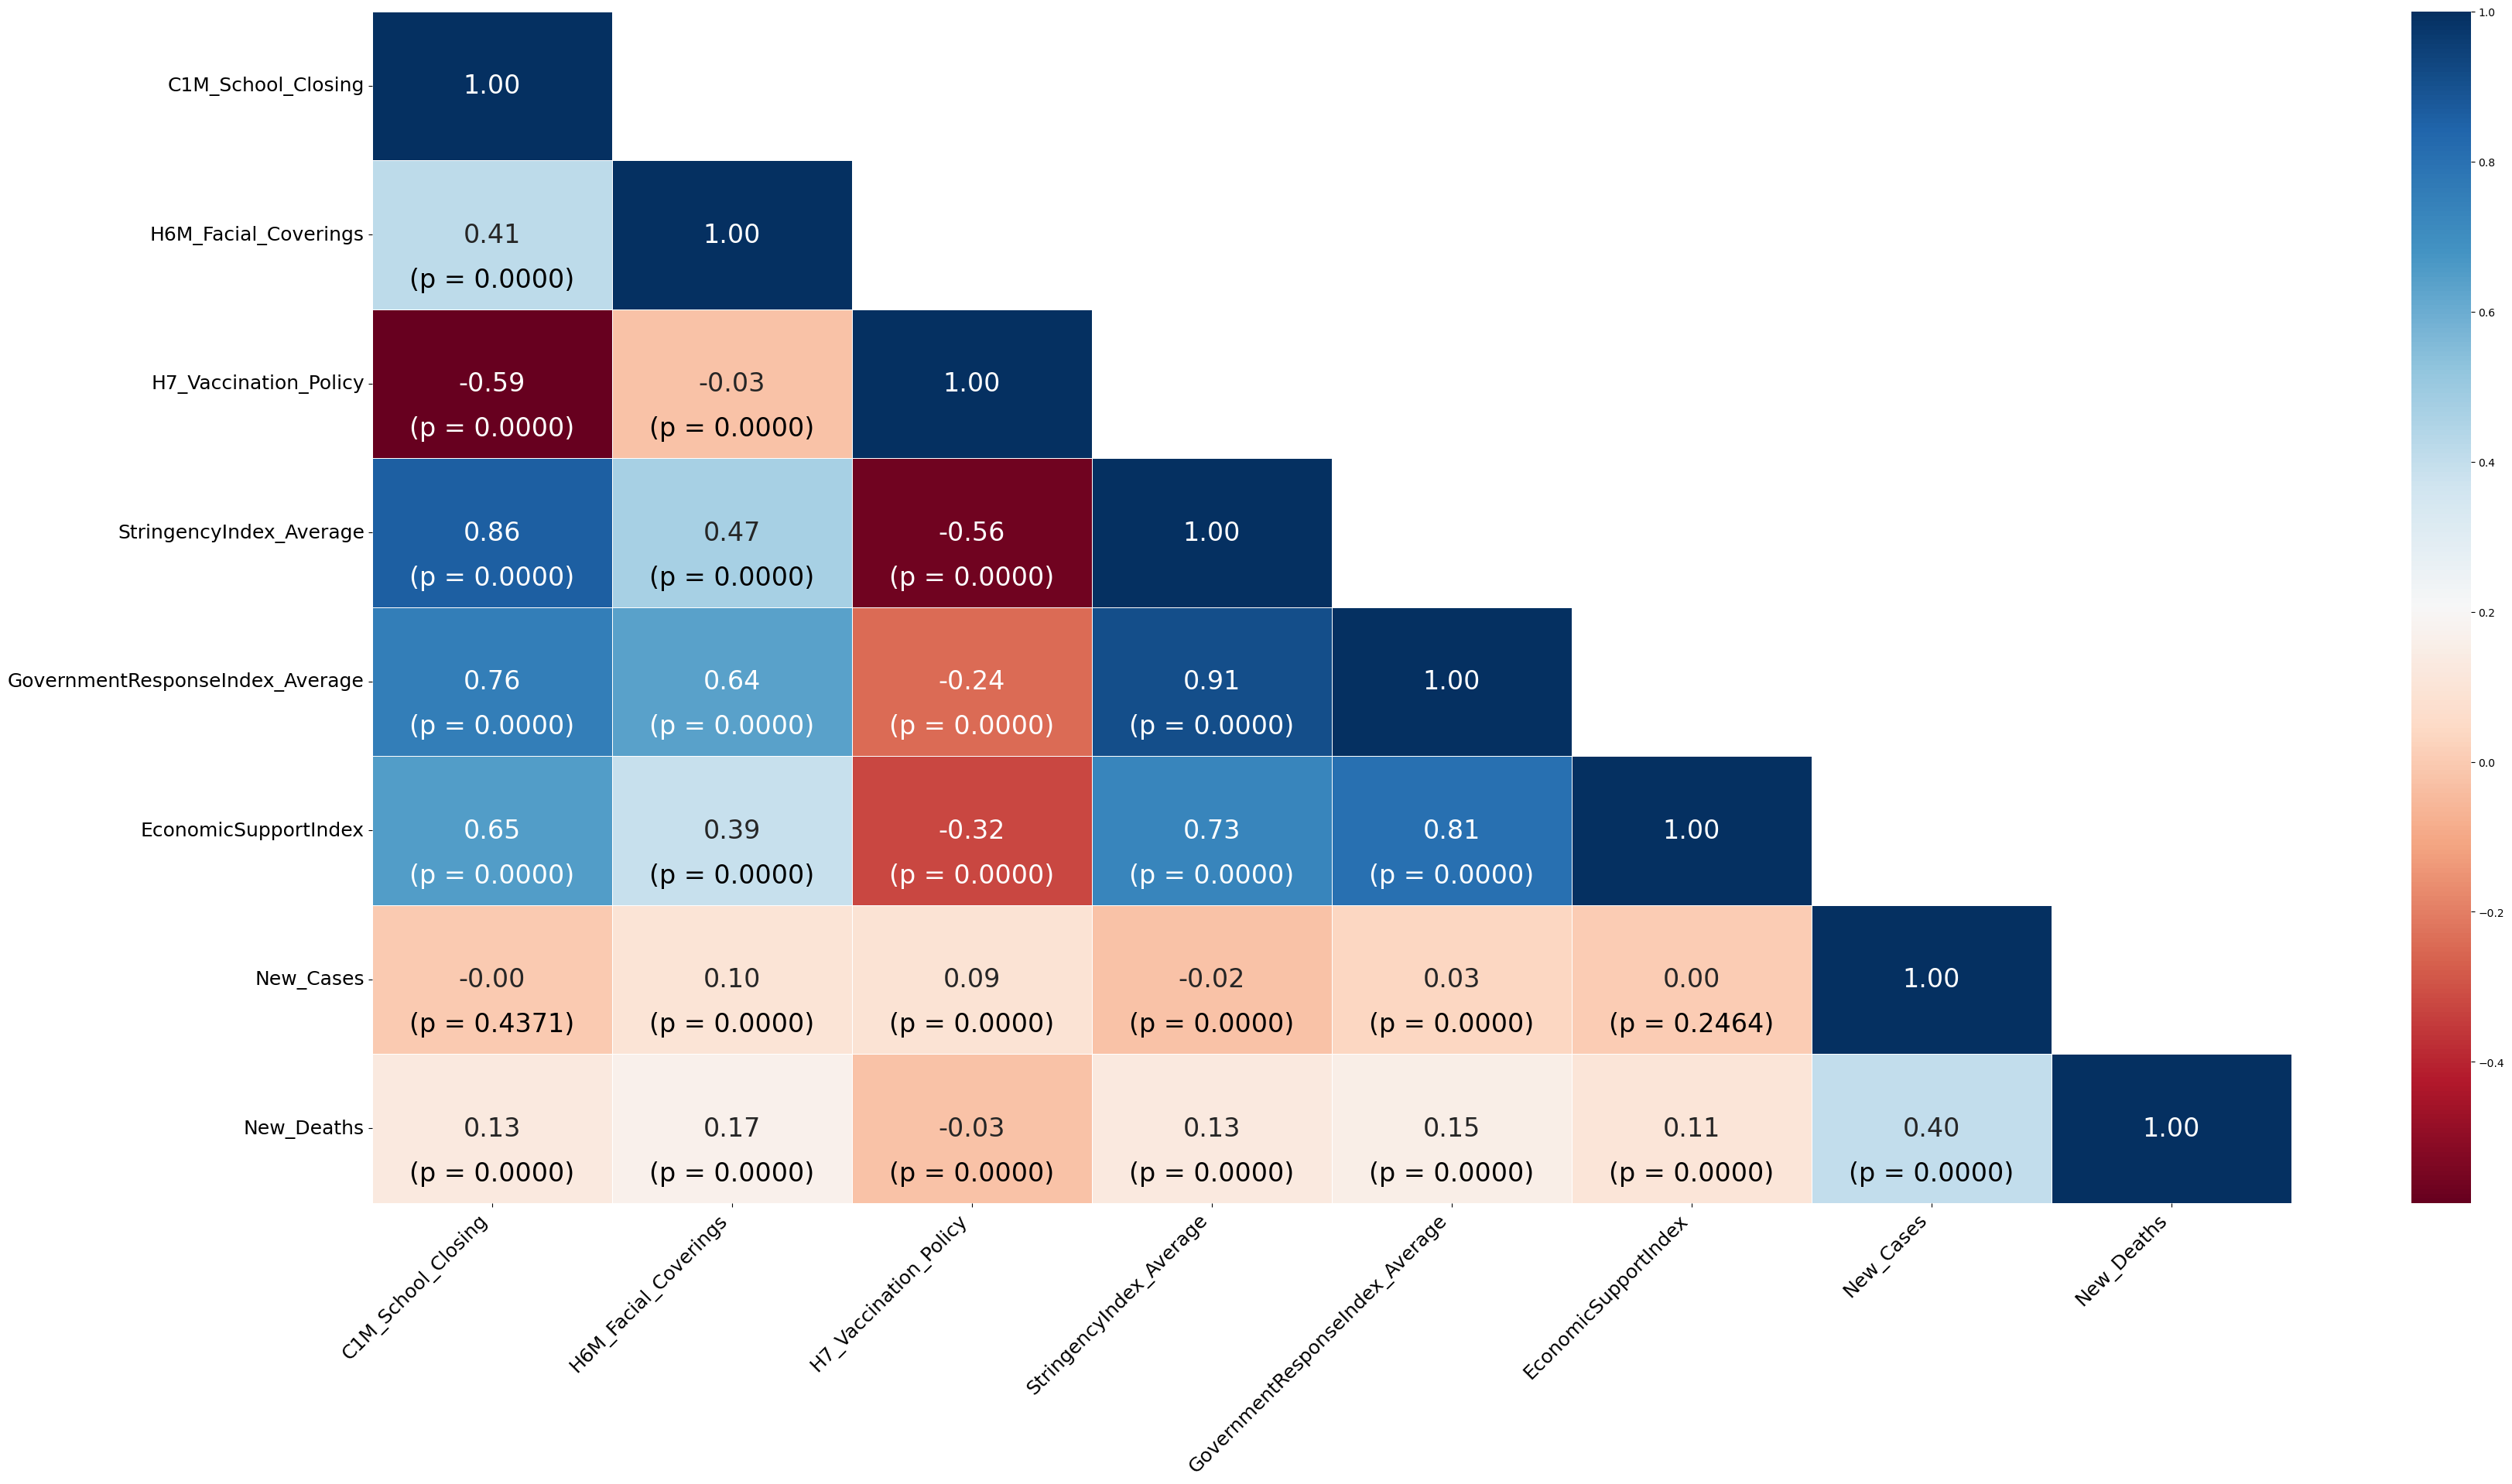

In [104]:
# Prior to converting predictors to ordinal categories, check correlation across all predictors
# This function geenerates a correlation heatmap with P-values
# https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77 

import seaborn as sns
from scipy.stats import pearsonr 

def corr_matrix_with_pval(df, method = 'pearson', figsize=(20, 10), title=None):
    
    data = df.copy()
    # Check features correlation
    corr = data.corr(method = method)

    # Create a mask to hide the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set the diagonal elements of the mask to False to display self-correlation
    np.fill_diagonal(mask, False)

    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title, fontsize=20)

   # Create the heatmap with the custom mask
    heatmap = sns.heatmap(corr,
                        annot=True,
                        annot_kws={"fontsize": 24},  # Adjust annotation font size
                        fmt='.2f',
                        linewidths=0.5,
                        cmap='RdBu',
                        mask=mask,
                        ax=ax)

    # Create a function to calculate and format p-values
    p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[1]):
            x = data.iloc[:, i]
            y = data.iloc[:, j]
            mask = ~np.logical_or(np.isnan(x), np.isnan(y))
            if np.sum(mask) > 0:
                if method == 'pearson':
                     p_values[i, j] = pearsonr(x[mask], y[mask])[1] 
                elif method == 'kendall':
                     p_values[i, j] = kendalltau(x[mask], y[mask])[1]
                elif method == 'spearman':
                     p_values[i, j] = spearmanr(x[mask], y[mask])[1]

    p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

    # Create a mask for the p-values heatmap
    mask_pvalues = np.triu(np.ones_like(p_values), k=1)

    # Calculate the highest and lowest correlation coefficients
    max_corr = np.max(corr.max())
    min_corr = np.min(corr.min())

    # Annotate the heatmap with p-values and change text color based on correlation value
    for i in range(p_values.shape[0]):
        for j in range(p_values.shape[1]):
            if mask_pvalues[i, j]:
                p_value = p_values.iloc[i, j]
                if not np.isnan(p_value):
                    correlation_value = corr.iloc[i, j]
                    text_color = 'white' if correlation_value >= (max_corr - 0.4) or correlation_value <= (min_corr + 0.4) else 'black'
                    ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.4f})',
                           horizontalalignment='center',
                           verticalalignment='center',
                           fontsize=24,
                           color=text_color)

    # Customize x-axis labels
#    x_labels = [textwrap.fill(label.get_text(), 13) for label in ax.get_xticklabels()]
    x_labels = [label.get_text() for label in ax.get_xticklabels()]
    ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=18)

    # Customize y-axis labels
#    y_labels = [textwrap.fill(label.get_text(), 13) for label in ax.get_yticklabels()]
    y_labels = [label.get_text() for label in ax.get_yticklabels()]
    ax.set_yticklabels(y_labels, rotation=0, ha="right",fontsize=18)

    plt.show()
    return


import matplotlib.pyplot as plt
from sklearn import datasets  
import pandas as pd 

df = (Covid_State_df.loc[:,['C1M_School_Closing', 'H6M_Facial_Coverings', 'H7_Vaccination_Policy', 'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
      'EconomicSupportIndex', 'New_Cases', 'New_Deaths']])
ttitle = 'Correlation with P-values across predictos and Response Variables'
tfigsize = (40, 20)
corr_matrix_with_pval(df,figsize=tfigsize)

In [105]:
Covid_State_df.dtypes

CountryName                                object
State                                      object
Jurisdiction                               object
Date                               datetime64[ns]
C1M_School_Closing                          int64
H6M_Facial_Coverings                        int64
H7_Vaccination_Policy                       int64
ConfirmedCases                            float64
ConfirmedDeaths                           float64
MajorityVaccinated                         object
PopulationVaccinated                      float64
StringencyIndex_Average                   float64
GovernmentResponseIndex_Average           float64
ContainmentHealthIndex_Average            float64
EconomicSupportIndex                      float64
New_Cases                                 float64
New_Deaths                                float64
dtype: object

In [106]:
# Filter Oxford covid data for only Virginia
# Generate a Week column, which is represented by Monday date of week
# Set Week date as index 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

#data = pd.read_csv("E:/Education/CIC-Big-Data-Hub/data/Covid_State_data.csv")
data = Covid_State_df.dropna(how='any', subset=['ConfirmedCases', 'ConfirmedDeaths', 'New_Cases', 'New_Deaths'])
data = data[data['State'] == 'Virginia']
data = data.set_index('Date')
# add monday of each week to identify week it belongs in
data['Week'] = data.index - data.index.weekday * np.timedelta64(1, 'D')

In [107]:
# Preprocessing
# Set negative counts = 0
# Define New Counts as int64
data.loc[data.New_Deaths < 0, 'New_Deaths'] = 0
data.loc[data.New_Cases < 0, 'New_Cases'] = 0
data.New_Cases = data.New_Cases.astype('int64') 
data.New_Deaths = data.New_Deaths.astype('int64') 
data.CountryName = data['CountryName'].astype(str)
data.State = data['State'].astype(str)
data.Jurisdiction = data['Jurisdiction'].astype(str)

In [108]:
#generate weekly covid totals dataset
group_key = ['CountryName','State', 'Jurisdiction', 'Week']
agg_spec = {'C1M_School_Closing': 'max', 'H6M_Facial_Coverings': 'max', 'H7_Vaccination_Policy': 'max',
            'ConfirmedCases':'max', 'ConfirmedDeaths':'max', 'PopulationVaccinated':'max', 'StringencyIndex_Average':'max',
            'GovernmentResponseIndex_Average':'max', 'ContainmentHealthIndex_Average':'max', 'EconomicSupportIndex':'max',
            'New_Cases':'sum','New_Deaths':'sum' }
weekly_data = data.groupby(group_key).agg(agg_spec).reset_index()
weekly_data['Week'] = pd.to_datetime(weekly_data['Week'], format='%Y-%m-%d')
weekly_data = weekly_data.set_index('Week')
weekly_data[0:5]

,CountryName,State,Jurisdiction,C1M_School_Closing,H6M_Facial_Coverings,H7_Vaccination_Policy,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,New_Cases,New_Deaths
Week,,,,,,,,,,,,,,,
2019-12-30,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0
2020-01-06,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0
2020-01-13,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0
2020-01-20,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,0.00,5.21,5.95,0.0,0,0
2020-01-27,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,2.78,6.77,7.74,0.0,0,0


In [109]:
# Check how many categories for each covid policy
print(len(data))
print(weekly_data.groupby('C1M_School_Closing').size())
print(weekly_data.groupby('H6M_Facial_Coverings').size())
print(weekly_data.groupby('H7_Vaccination_Policy').size())

1096
C1M_School_Closing
0    51
1    38
2    46
3    22
dtype: int64
H6M_Facial_Coverings
0     10
1     26
2    104
3     17
dtype: int64
H7_Vaccination_Policy
0    50
2     3
3    14
5    90
dtype: int64


In [110]:
# Set up categories and apply them to predictors
my6_categories=pd.CategoricalDtype(categories=[0,1,2,3,4,5],ordered=True)
my4_categories=pd.CategoricalDtype(categories=[0,1,2,3],ordered=True)
# then we can just pass this to the astype() function
weekly_data["C1M_School_Closing"]=weekly_data["C1M_School_Closing"].astype(my4_categories)
weekly_data["H6M_Facial_Coverings"]=weekly_data["H6M_Facial_Coverings"].astype(my4_categories)
weekly_data["H7_Vaccination_Policy"]=weekly_data["H7_Vaccination_Policy"].astype(my6_categories)

In [111]:
# Check that categories and summaries were applied correctly for each covid policy
print(len(weekly_data))
print(weekly_data.groupby('C1M_School_Closing').size())
print(weekly_data.groupby('H6M_Facial_Coverings').size())
print(weekly_data.groupby('H7_Vaccination_Policy').size())

157
C1M_School_Closing
0    51
1    38
2    46
3    22
dtype: int64
H6M_Facial_Coverings
0     10
1     26
2    104
3     17
dtype: int64
H7_Vaccination_Policy
0    50
1     0
2     3
3    14
4     0
5    90
dtype: int64


<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Read in Weekly Hospitialization Data</font>
    </p>
</div>

In [112]:
# Read in weekly state hospitalizations and join with weekly_data
# Adjust week to be Monday of week.
# Join with Oxford data
from datetime import timedelta
# https://covid.cdc.gov/covid-data-tracker/#trends_weeklyhospitaladmissions_select_51
#vhosp = pd.read_csv("E:/Education/CIC-Big-Data-Hub/data/Virginia-Weekly-Hospitalizations.csv")
vhosp = pd.read_csv("data/Virginia-Weekly-Hospitalizations.csv")
vhosp['Date'] = pd.to_datetime(vhosp['Date'], format='%b %d %Y')
vhosp["Date"] = vhosp["Date"] + timedelta(days=2)
vhosp.sort_values('Date',ascending=True,inplace=True)
vhosp = vhosp.set_index('Date')
vhosp.columns = ['State', 'Hospitalizations']
vhosp.loc[vhosp['Hospitalizations'].isnull(),'Hospitalizations'] = 0
weekly_data = weekly_data.join(vhosp['Hospitalizations'], how='inner')
weekly_data.index.names = ['Date']

weekly_data[0:5]
#weekly_data.columns[0] = 'Week'

,CountryName,State,Jurisdiction,C1M_School_Closing,H6M_Facial_Coverings,H7_Vaccination_Policy,ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,New_Cases,New_Deaths,Hospitalizations
Date,,,,,,,,,,,,,,,,
2020-01-13,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,0,0.0
2020-01-20,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,0.00,5.21,5.95,0.0,0,0,0.0
2020-01-27,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,2.78,6.77,7.74,0.0,0,0,0.0
2020-02-03,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,2.78,6.77,7.74,0.0,0,0,0.0
2020-02-10,United States,Virginia,STATE_TOTAL,0,0,0,0.0,0.0,0.0,8.33,9.90,11.31,0.0,0,0,0.0


In [113]:
# Examine for Nulls and get 5-point stats
# set print width to 120
pd.set_option("display.width", 120)
print(len(weekly_data))
#print(weekly_data.groupby('H7_Vaccination_Policy').size())
print(weekly_data.isna().sum())
print(weekly_data.describe())

155
CountryName                        0
State                              0
Jurisdiction                       0
C1M_School_Closing                 0
H6M_Facial_Coverings               0
H7_Vaccination_Policy              0
ConfirmedCases                     0
ConfirmedDeaths                    0
PopulationVaccinated               0
StringencyIndex_Average            0
GovernmentResponseIndex_Average    0
ContainmentHealthIndex_Average     0
EconomicSupportIndex               0
New_Cases                          0
New_Deaths                         0
Hospitalizations                   0
dtype: int64
       ConfirmedCases  ConfirmedDeaths  PopulationVaccinated  StringencyIndex_Average  \
count    1.550000e+02       155.000000            155.000000               155.000000   
mean     9.044214e+05     11291.374194             38.928516                36.972839   
std      7.545890e+05      7817.929291             33.032086                20.688760   
min      0.000000e+00         0.000

In [114]:
# add policy lags for prior 3 weeks on Predictors
weekly_data['P1W_C1M'] = weekly_data['C1M_School_Closing'].shift(1) 
weekly_data['P1W_C1M'] = weekly_data['P1W_C1M'].astype(my4_categories)
weekly_data.loc[weekly_data['P1W_C1M'].isnull(), 'P1W_C1M'] = 0
weekly_data['P2W_C1M'] = weekly_data['C1M_School_Closing'].shift(2) 
weekly_data['P2W_C1M'] = weekly_data['P2W_C1M'].astype(my4_categories)
weekly_data.loc[weekly_data['P2W_C1M'].isnull(), 'P2W_C1M'] = 0
weekly_data['P3W_C1M'] = weekly_data['C1M_School_Closing'].shift(3) 
weekly_data.loc[weekly_data['P3W_C1M'].isnull(), 'P3W_C1M'] = 0
weekly_data['P3W_C1M'] = weekly_data['P3W_C1M'].astype(my4_categories)

weekly_data['P1W_H6M'] = weekly_data['H6M_Facial_Coverings'].shift(1) 
weekly_data.loc[weekly_data['P1W_H6M'].isnull(), 'P1W_H6M'] = 0
weekly_data['P1W_H6M'] = weekly_data['P1W_H6M'].astype(my4_categories)
weekly_data['P2W_H6M'] = weekly_data['H6M_Facial_Coverings'].shift(2) 
weekly_data.loc[weekly_data['P2W_H6M'].isnull(), 'P2W_H6M'] = 0
weekly_data['P2W_H6M'] = weekly_data['P2W_H6M'].astype(my4_categories)
weekly_data['P3W_H6M'] = weekly_data['H6M_Facial_Coverings'].shift(3) 
weekly_data.loc[weekly_data['P3W_H6M'].isnull(), 'P3W_H6M'] = 0
weekly_data['P3W_H6M'] = weekly_data['P3W_H6M'].astype(my4_categories)

weekly_data['P1W_H7'] = weekly_data['H7_Vaccination_Policy'].shift(1) 
weekly_data.loc[weekly_data['P1W_H7'].isnull(), 'P1W_H7'] = 0
weekly_data['P1W_H7'] = weekly_data['P1W_H7'].astype(my6_categories)
weekly_data['P2W_H7'] = weekly_data['H7_Vaccination_Policy'].shift(2) 
weekly_data.loc[weekly_data['P2W_H7'].isnull(), 'P2W_H7'] = 0
weekly_data['P2W_H7'] = weekly_data['P2W_H7'].astype(my6_categories)
weekly_data['P3W_H7'] = weekly_data['H7_Vaccination_Policy'].shift(3) 
weekly_data.loc[weekly_data['P3W_H7'].isnull(), 'P3W_H7'] = 0
weekly_data['P3W_H7'] = weekly_data['P3W_H7'].astype(my6_categories)

weekly_data[['C1M_School_Closing', 'P1W_C1M', 'P2W_C1M', 'P3W_C1M',
             'H6M_Facial_Coverings', 'P1W_H6M', 'P2W_H6M', 'P3W_H6M', 
             'H7_Vaccination_Policy','P1W_H7', 'P2W_H7', 'P3W_H7']][5:15]

weekly_data.dtypes


CountryName                          object
State                                object
Jurisdiction                         object
C1M_School_Closing                 category
H6M_Facial_Coverings               category
H7_Vaccination_Policy              category
ConfirmedCases                      float64
ConfirmedDeaths                     float64
PopulationVaccinated                float64
StringencyIndex_Average             float64
GovernmentResponseIndex_Average     float64
ContainmentHealthIndex_Average      float64
EconomicSupportIndex                float64
New_Cases                             int64
New_Deaths                            int64
Hospitalizations                    float64
P1W_C1M                            category
P2W_C1M                            category
P3W_C1M                            category
P1W_H6M                            category
P2W_H6M                            category
P3W_H6M                            category
P1W_H7                          

<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Show Covid Strain Cycles and School Policy Decisions with Outcome Timelines</font>
    <br><br> Strain introductions are represented by gray dotted lines (Alpha, Beta, Delta, and Omicron)
    <br><br> School Closing Policy represented by colored lines, red = all closed, orange = some closed, yellow = open with restrictions,
    <br> green = all open no restrictions    
    </p>
</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


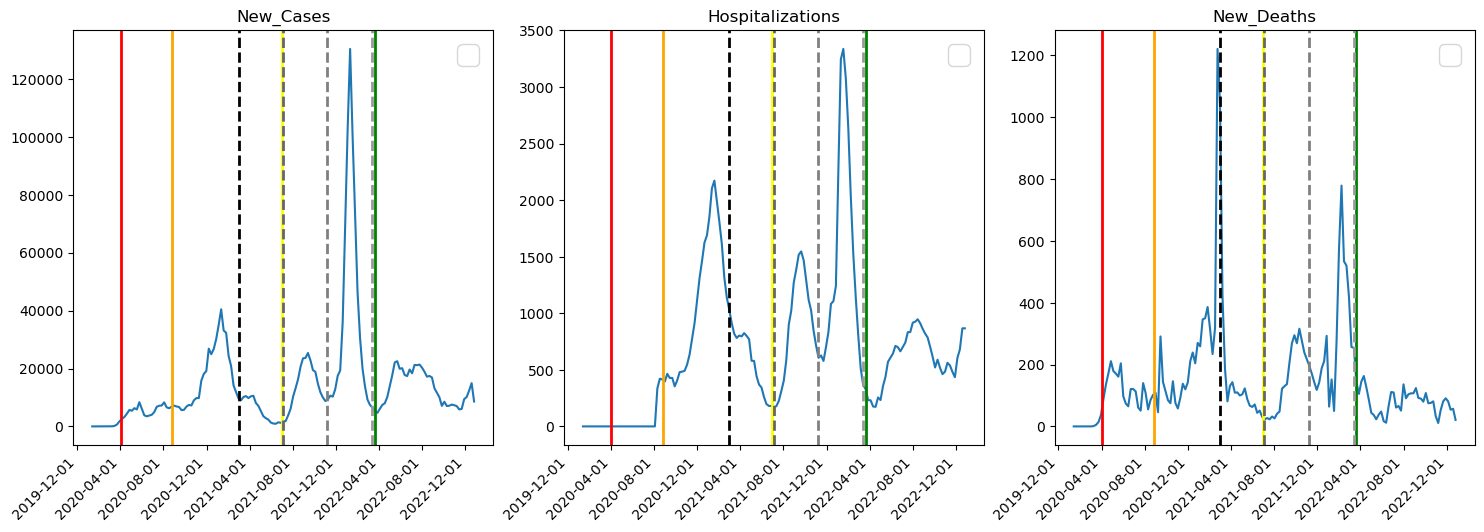

In [118]:
# Show COVID-19 Outcpmes with Strain 'seasons', and School Policy Changes

import datetime
import matplotlib.dates as mdates

figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
figure.tight_layout(pad=2.0)

myFmt = mdates.DateFormatter('%Y-%m-%d')                            

column_list = ['New_Cases', 'Hospitalizations', 'New_Deaths']

for count, cname in enumerate(column_list) :
    axis[count].plot(weekly_data.index, weekly_data[cname])
    axis[count].legend(fontsize="20", loc ="upper right")
    axis[count].axvline(datetime.datetime(2020, 4, 2), color='red', label='All Schools Closed', lw=2)
    axis[count].axvline(datetime.datetime(2020, 8, 26), color='orange', label='Some Schools Closed', lw=2)
    axis[count].axvline(datetime.datetime(2021, 7, 1), color='yellow',label='All Open with Alterations', lw=2)
    axis[count].axvline(datetime.datetime(2022, 3, 21), color='green',label='No Restrictions', lw=2)
    axis[count].axvline(datetime.datetime(2021, 3, 1), color='black', label='Alpha',linestyle = 'dashed', linewidth = 2 )
    axis[count].axvline(datetime.datetime(2021, 7, 4), color='0.40', label='Beta',linestyle = 'dashed', linewidth = 2 )
    axis[count].axvline(datetime.datetime(2021, 11, 7), color='0.50', label='Delta',linestyle = 'dashed', linewidth = 2 )
    axis[count].axvline(datetime.datetime(2022, 3, 14), color='0.60', label='Omicron',linestyle = 'dashed', linewidth = 2 )
    axis[count].xaxis.set_major_formatter(myFmt)
    axis[count].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[count].set_xticks([], minor=True);
    axis[count].set_title(cname)
    for label in axis[count].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
    #plt.legend()

In [120]:
# find 18-week covid cycle/seasonal dates
from datetime import datetime

def get_days_between(date1, date2):
    return (date2 - date1).days/7

date1 = datetime(2020, 1, 1)
date2 = datetime(2021, 3, 1)
date3 = datetime(2021, 3, 2)
date4 = datetime(2021, 7, 4)
date5 = datetime(2021, 7, 5)
date6 = datetime(2021, 11, 7)
date7 = datetime(2021, 11, 8)
date8 = datetime(2022, 3, 14)

alpha_days = get_days_between(date1,date2)
beta_days = get_days_between(date3,date4)
delta_days = get_days_between(date5,date6)
omicron_days = get_days_between(date7,date8)

print('alpha_days', alpha_days, 'beta_days', beta_days, 'delta_days', delta_days, 'omicron_days', omicron_days)


alpha_days 60.714285714285715 beta_days 17.714285714285715 delta_days 17.857142857142858 omicron_days 18.0


In [121]:
# Generate response variable counts for each covid strain cycle 
from pandasql import sqldf

query_table = weekly_data.copy()
query_table.reset_index(inplace=True)

sql01 = """ Select 'alpha' as strain, sum(New_Cases), sum(Hospitalizations), sum(New_Deaths)  
            from query_table 
            where Date between '2020-01-01' and '2021-03-01' 
            UNION
            Select 'beta' as strain, sum(New_Cases), sum(Hospitalizations), sum(New_Deaths) 
            from query_table
            where Date between '2021-03-02' and '2021-07-04' 
            UNION
            Select 'delta' as strain, sum(New_Cases), sum(Hospitalizations), sum(New_Deaths) 
            from query_table
            where Date between '2021-07-05' and '2021-11-07' 
            UNION
            Select 'Omicron' as strain, sum(New_Cases), sum(Hospitalizations), sum(New_Deaths) 
            from query_table
            where Date between '2021-11-08' and '2022-03-14' """

result = sqldf(sql01)
print(result)

    strain  sum(New_Cases)  sum(Hospitalizations)  sum(New_Deaths)
0  Omicron          719670                27381.0             5088
1    alpha          576050                29177.0             8564
2     beta           95604                 9642.0             1927
3    delta          252642                15997.0             2698


<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Complete Time Series Seasonal Decomposition in Preparation of SARIMAX</font>
    </p>
</div>

In [ ]:
# Plots
# https://www.kaggle.com/code/gadaadhaarigeek/q-q-plot
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

column_list = ['New_Cases', 'Hospitalizations', 'New_Deaths']

figure, axis = plt.subplots(nrows=4, ncols=len(column_list), figsize=(15, 15))
figure.tight_layout(pad=5.0)
myFmt = mdates.DateFormatter('%Y-%m-%d')                            

decompose_df = pd.DataFrame(columns=['Column', 'Date', 'Observed', 'Trend', 'Seasonal', 'Resid'])
for count, cname in enumerate(column_list):
    temp_decompose = seasonal_decompose(weekly_data[cname], model="additive",period=18)
    frames = {'Date':temp_decompose.observed.index,'Observed':temp_decompose.observed.values, 
              'Trend':temp_decompose.trend.values, 'Seasonal':temp_decompose.seasonal.values,
              'Resid':temp_decompose.resid.values}
    temp_df1 = pd.DataFrame(frames)
    temp_df1['Column'] = cname
    decompose_df = pd.concat([decompose_df, temp_df1])
    axis[0,count].plot(temp_df1['Date'], temp_df1['Observed'])
    axis[0,count].xaxis.set_major_formatter(myFmt)
    axis[0,count].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[0,count].set_xticks([], minor=True);
    axis[0,count].set_title('Observations')
    for label in axis[0,count].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
    axis[1,count].plot(temp_df1['Date'], temp_df1['Seasonal'])
    axis[1,count].xaxis.set_major_formatter(myFmt)
    axis[1,count].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[1,count].set_xticks([], minor=True);
    axis[1,count].set_title('Seasonal')
    for label in axis[1,count].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
    axis[2,count].plot(temp_df1['Date'], temp_df1['Trend'])
    axis[2,count].xaxis.set_major_formatter(myFmt)
    axis[2,count].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[2,count].set_xticks([], minor=True);
    axis[2,count].set_title('Trend')
    for label in axis[2,count].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
    axis[3,count].plot(temp_df1['Date'], temp_df1['Resid'], 'o')
    #ticks_loc = axis[3,count].get_xticks().tolist()
    axis[3,count].xaxis.set_major_formatter(myFmt)
    axis[3,count].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[3,count].set_xticks([], minor=True);
    axis[3,count].set_title('Residuals')
    for label in axis[3,count].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
figure.suptitle(' Time Series Decomposition\n  Weekly Counts\nNew_Cases, Hospitalizations, New Deaths\n\n', 
                fontsize=24, x=.5, y=.99, va='center')

plt.show() 

In [125]:
# This coode is used to subtract two dates to determine seasonal period
# Seasonal Period = 18 weeks
date3 = pd.datetime(2020, 9, 21)
date2 = pd.datetime(2020, 5, 18)
date1 = pd.datetime(2020, 1, 13)

# Calculate the number of days between the two dates
#delta = date2 - date1
x = pd.to_datetime(date3) - pd.to_datetime(date2)
y = pd.to_datetime(date2) - pd.to_datetime(date1)
print('num_weeks', int(x / np.timedelta64(1, 'W')))
print('num_weeks', int(y / np.timedelta64(1, 'W')))


num_weeks 18
num_weeks 18


C:\Users\rolan\AppData\Local\Temp\ipykernel_42448\1552396880.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date3 = pd.datetime(2020, 9, 21)
C:\Users\rolan\AppData\Local\Temp\ipykernel_42448\1552396880.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date2 = pd.datetime(2020, 5, 18)
C:\Users\rolan\AppData\Local\Temp\ipykernel_42448\1552396880.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date1 = pd.datetime(2020, 1, 13)


<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Check Stationarity on New Cases, Hospitalizations, and Deaths <br>with ACF and KPSS Tests</font>
    <br><br>
To perform forecasting using the ARIMA model, we required a stationary time series. Stationary time series is a time series that is unaffected by these four components. Most often, it happens when the data is non-stationary the predictions we get from the ARIMA model are worse or not that accurate.

If the data is not stationary, we can do one thing: either make the data stationary or use the SARIMAX model.

To know more about the time series stationarity, we can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.
        
        All Tests assert Stationality for all response columns
</p>
</div>

In [126]:
#Performing the ADF and KPSS Test on data.
# ADF Test -> Rejects null H0 that data is not stationary 
# KPSS Test -> Accepts null HO that data is stationary
# Therefore data is stationary

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

for cname in column_list:
    print('\nTest stationarity for', cname)
    print('-------------------------------------')
    adfuller_result = adfuller(weekly_data[cname])
    kpss_result = kpss(weekly_data[cname])
    print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
    print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')





Test stationarity for New_Cases
-------------------------------------
ADF Statistic: -4.04771600129901, p-value: 0.0011802665841845403
KPSS Statistic: 0.2979117571957929, p-value: 0.1

Test stationarity for Hospitalizations
-------------------------------------
ADF Statistic: -3.740296546279946, p-value: 0.0035807559583704465
KPSS Statistic: 0.3629310035332133, p-value: 0.09313318813223564

Test stationarity for New_Deaths
-------------------------------------
ADF Statistic: -4.156179203172658, p-value: 0.0007809401936654024
KPSS Statistic: 0.1430918107788627, p-value: 0.1


C:\Users\rolan\AppData\Local\Temp\ipykernel_42448\3539668791.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(weekly_data[cname])
C:\Users\rolan\AppData\Local\Temp\ipykernel_42448\3539668791.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(weekly_data[cname])


<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Examine Data for Best Order and Seasonal Order Parameters <br>For Each Response Variable</font>
    <br><br>

Order parameters

p  autoregressing (order of AR lags)
q  differencing   (order of differencing) 
m  moving average (order of moving average lags)

Sarimax Seasonal Order

P: Seasonal Autoregressive order
D: Seasonal difference order
Q: Seasonal moving average order
m: The number of time steps for a single seasonal period.
        
</p>
</div>


In [127]:
# Use auto_arima to estimage parameters
import pmdarima as pm

arima_order_df = pd.DataFrame(columns=['Column', 'Order', 'Seasonal_Order'])
for cname in column_list:
    results = pm.auto_arima(weekly_data[cname], stat_p = 0, stat_q = 0, max_p = 4, max_q = 4,
                       seasonal=True, m = 18, start_P = 1, start_Q = 1, max_P = 4, max_Q = 4,
                       information_criterion='aic', stepwise= True)
    arima_order_df = pd.concat([pd.DataFrame([[cname, results.order,results.seasonal_order]], columns=arima_order_df.columns), arima_order_df], ignore_index=True)

arima_order_df

,Column,Order,Seasonal_Order
0,New_Deaths,"(3, 0, 0)","(0, 0, 0, 18)"
1,Hospitalizations,"(1, 1, 1)","(0, 0, 1, 18)"
2,New_Cases,"(2, 0, 2)","(0, 0, 0, 18)"


<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Generate Dummy Variables for Categorical Predictors <br>for Later Testing/Comparison</font>
    <br>
</p>
</div>


In [128]:
# generate dummay variables and readd in the original variables for compartison testing
weekly_dummied = pd.get_dummies(weekly_data, columns=['P1W_C1M', 'P2W_C1M', 'P3W_C1M', 'C1M_School_Closing', 
                                                      'P1W_H6M', 'P2W_H6M', 'P3W_H6M', 'H6M_Facial_Coverings', 
                                                      'P1W_H7', 'P2W_H7', 'P3W_H7','H7_Vaccination_Policy'])
print(weekly_dummied.columns)
weekly_dummied['C1M_School_Closing'] = weekly_data['C1M_School_Closing']
weekly_dummied['H6M_Facial_Coverings'] = weekly_data['H6M_Facial_Coverings']
weekly_dummied['H7_Vaccination_Policy'] = weekly_data['H7_Vaccination_Policy']

Index(['CountryName', 'State', 'Jurisdiction', 'ConfirmedCases', 'ConfirmedDeaths', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'New_Cases', 'New_Deaths', 'Hospitalizations', 'P1W_C1M_0', 'P1W_C1M_1', 'P1W_C1M_2',
       'P1W_C1M_3', 'P2W_C1M_0', 'P2W_C1M_1', 'P2W_C1M_2', 'P2W_C1M_3', 'P3W_C1M_0', 'P3W_C1M_1', 'P3W_C1M_2',
       'P3W_C1M_3', 'C1M_School_Closing_0', 'C1M_School_Closing_1', 'C1M_School_Closing_2', 'C1M_School_Closing_3',
       'P1W_H6M_0', 'P1W_H6M_1', 'P1W_H6M_2', 'P1W_H6M_3', 'P2W_H6M_0', 'P2W_H6M_1', 'P2W_H6M_2', 'P2W_H6M_3',
       'P3W_H6M_0', 'P3W_H6M_1', 'P3W_H6M_2', 'P3W_H6M_3', 'H6M_Facial_Coverings_0', 'H6M_Facial_Coverings_1',
       'H6M_Facial_Coverings_2', 'H6M_Facial_Coverings_3', 'P1W_H7_0', 'P1W_H7_1', 'P1W_H7_2', 'P1W_H7_3', 'P1W_H7_4',
       'P1W_H7_5', 'P2W_H7_0', 'P2W_H7_1', 'P2W_H7_2', 'P2W_H7_3', 'P2W_H7_4', 'P2W_H7_5', 'P3W_H7_0', '

In [129]:
# Confirm dummies were correctly set
weekly_dummied[['C1M_School_Closing','C1M_School_Closing_1', 'H6M_Facial_Coverings','H6M_Facial_Coverings_2', 'H7_Vaccination_Policy', 'H7_Vaccination_Policy']][100:105]

,C1M_School_Closing,C1M_School_Closing_1,H6M_Facial_Coverings,H6M_Facial_Coverings_2,H7_Vaccination_Policy,H7_Vaccination_Policy
Date,,,,,,
2021-12-13,1,1,2,1,5,5
2021-12-20,1,1,2,1,5,5
2021-12-27,1,1,2,1,5,5
2022-01-03,1,1,2,1,5,5
2022-01-10,1,1,2,1,5,5


In [130]:
# generate list of list of individual and group predictors
# https://note.nkmk.me/en/python-list-str-select-replace/
import re
preds = [[s] for s in weekly_dummied.columns if re.match('^.*_[1-5]', s)]
C1M_preds = ['C1M_School_Closing_1', 'C1M_School_Closing_2', 'C1M_School_Closing_3']
P1W_C1M_preds = ['P1W_C1M_1', 'P1W_C1M_2', 'P1W_C1M_3']
P2W_C1M_preds = ['P2W_C1M_1', 'P2W_C1M_2', 'P2W_C1M_3']
P3W_C1M_preds = ['P3W_C1M_1', 'P3W_C1M_2', 'P3W_C1M_3']
H6M_preds = ['H6M_Facial_Coverings_1', 'H6M_Facial_Coverings_2', 'H6M_Facial_Coverings_3']
H7_preds = ['H7_Vaccination_Policy_1', 'H7_Vaccination_Policy_2', 'H7_Vaccination_Policy_3', 'H7_Vaccination_Policy_4']
preds.append(C1M_preds)
preds.append(H6M_preds)
preds.append(H7_preds)
preds.append(['C1M_School_Closing'])
preds.append(['H6M_Facial_Coverings'])
preds.append(['H7_Vaccination_Policy'])
preds.append(P1W_C1M_preds)
preds.append(P2W_C1M_preds)
preds.append(P3W_C1M_preds)
total_unique = [x for s in preds for x in s]
total_unique = [s for s in set(x for x in total_unique)]
preds.append(total_unique)
preds
#weekly_dummied[pred_list][70:156]
#pred_list=[s for s in preds for x in s if 'H7' in x]
pred_list=[s for s in preds for x in s]
pred_list = [list(s) for s in set(tuple(x) for x in pred_list)]
temp_preds = None
#pred_list

In [131]:
# function to calculate performance staistics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
def generate_perf_stats(cname, pname, test_df):
    
    rmse =mean_squared_error(test_df['obs'], test_df['pred'],squared=False)
    mape =mean_absolute_percentage_error(test_df['obs'], test_df['pred'])
    return (cname, pname, rmse, mape)

<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Build and SAMIRAX Test Times Series Model</font><br><br>
     - Model is build on weeks 0 - 70<br>
     - Model is tested on weeks 71 - 155<br>
    <br> Build Models for the Previously Determined Best Performing
    <br> First model is with no covariates    
    <br>
</p>
</div>

In [132]:
limited_preds = [['C1M_School_Closing_2'], ['H6M_Facial_Coverings'], ['P3W_H6M_3'], ['P3W_H7_5'],['H6M_Facial_Coverings']]


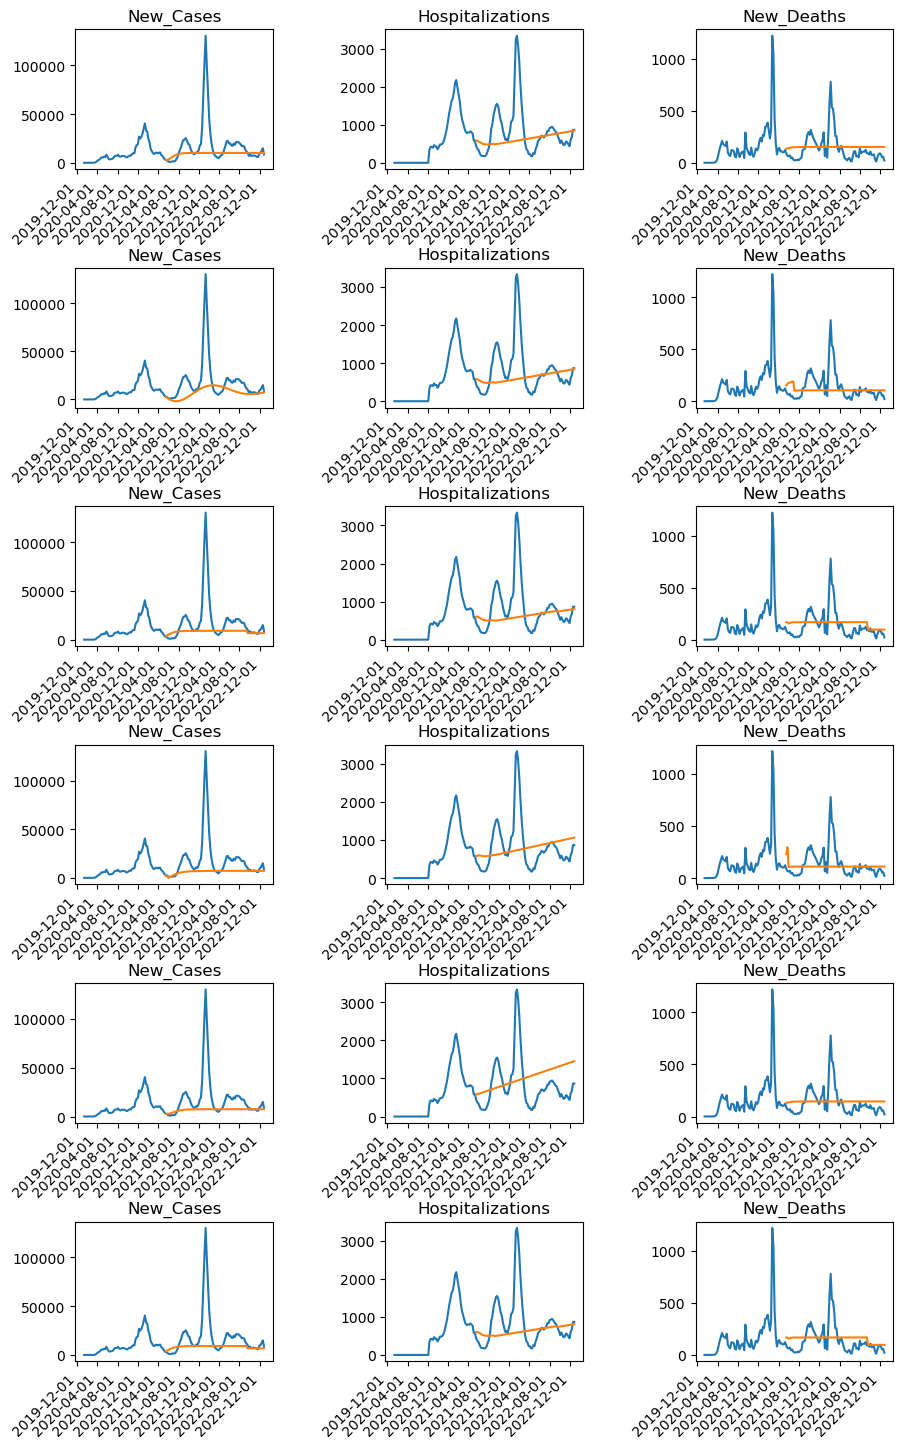

In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

weekly_dummied.index = pd.DatetimeIndex(weekly_data.index.values,
                               freq=weekly_data.index.inferred_freq)

figure, axis = plt.subplots(nrows=6, ncols=len(column_list), figsize=(10, 15))
figure.tight_layout(pad=5.0)
myFmt = mdates.DateFormatter('%Y-%m-%d')

perf_df = pd.DataFrame(columns=['Pred_Cnt','Response','Predictors', 'RMSE', 'Mape'])
#Fitting the model into time series.
for count,cname in enumerate(column_list):
    temp_df = pd.DataFrame(weekly_dummied[cname].copy())
    temp_order = arima_order_df[arima_order_df.Column == cname]['Order'].values[0]
    #print(len(temp_order))
    temp_sorder = arima_order_df[arima_order_df.Column == cname]['Seasonal_Order'].values[0]
    #print(len(temp_sorder))
    model=SARIMAX(temp_df[cname][0:70],order=temp_order,seasonal_order=temp_sorder, trend='c')
    results=model.fit()
    #print(results.summary())
    #Testing the fitted model.
    temp_df['forecast']=results.predict(start=70,end=155,dynamic =True)
    frames = {'obs':temp_df[70:155][cname].values, 
              'pred':temp_df[70:155]['forecast'].values, 
              'resid':(temp_df[70:155][cname].values - temp_df[70:155]['forecast'].values)}
    tstValues = pd.DataFrame(frames)
    tcname, tpname, trmse, tmape = generate_perf_stats(cname, 'no_exog', tstValues)
    perf_df.loc[len(perf_df.index)] = [0,tcname, tpname, trmse, tmape]  
    
    axis[0,count].plot(temp_df[[cname,'forecast']])
    axis[0,count].xaxis.set_major_formatter(myFmt)
    axis[0,count].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[0,count].set_xticks([], minor=True);
    axis[0,count].set_title(cname)
    for label in axis[0,count].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right') 
        

for count,cname in enumerate(column_list):
    for pred_cnt, predictor in enumerate(limited_preds):
        #print(pred_list)
        #test_list += [test_str] 
        gcolumns = [cname] + predictor 
        temp_preds = predictor 
        #print(temp_preds)
        temp_df = pd.DataFrame(weekly_dummied[gcolumns].copy())
        temp_order = arima_order_df[arima_order_df.Column == cname]['Order'].values[0]
        #print(len(temp_order))
        temp_sorder = arima_order_df[arima_order_df.Column == cname]['Seasonal_Order'].values[0]
        #print(len(temp_sorder))
    
        model2 = SARIMAX(endog=temp_df[cname][0:70], exog=temp_df[temp_preds][0:70],
                                  order=temp_order,
                                  seasonal_order=temp_sorder,
                                  trend='c',
                                  freq='W-MON')
    
        results2=model2.fit(maxiter=10000, method='nm', disp=False)
        #print(results2.summary())
        #Testing the fitted model.pred_cnt+1
        temp_df['forecast'] = results2.predict(start='2021-05-17', end='2022-12-26',
                                           exog=temp_df[temp_preds][70:156],dynamic=True)
        frames = {'obs':temp_df[70:155][cname].values, 
                  'pred':temp_df[70:155]['forecast'].values, 
                  'resid':(temp_df[70:155][cname].values - temp_df[70:155]['forecast'].values)}
        tstValues2 = pd.DataFrame(frames)
        
        tcname, tpname, trmse, tmape = generate_perf_stats(cname, predictor, tstValues2)
        perf_df.loc[len(perf_df.index)] = [pred_cnt, tcname, tpname, trmse, tmape]
                  
        axis[pred_cnt+1,count].plot(temp_df[[cname,'forecast']])
        axis[pred_cnt+1,count].xaxis.set_major_formatter(myFmt)
        axis[pred_cnt+1,count].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
        axis[pred_cnt+1,count].set_xticks([], minor=True);
        axis[pred_cnt+1,count].set_title(cname)
        for label in axis[pred_cnt+1,count].get_xticklabels(which='major'):
            label.set(rotation=45, horizontalalignment='right') 

#perf_df[0:10]

<div class="alert alert-block alert-info">
    <p>
    <b><font size="5"><center>Get Performance Data from Best Performing SARIMAX Models</center><br>
        <center>by Response Variable</font></center><br>
</p>
</div>

In [135]:
# This cell has sql problems
#Find best predictors with smallest RSME for resposne variable
pd.set_option('display.max_rows', 200)
print('\nHospitalizations')
print(perf_df[perf_df.Response == 'Hospitalizations'].sort_values(by=['Response','RMSE'], ascending=[True, True]))
print('\nNew Cases')
print(perf_df[perf_df.Response == 'New_Cases'].sort_values(by=['Response','RMSE'], ascending=[True, True]))
print('\nNew Deaths')
print(perf_df[perf_df.Response == 'New_Deaths'].sort_values(by=['Response','RMSE'], ascending=[True, True]))
    


Hospitalizations
    Pred_Cnt          Response              Predictors        RMSE      Mape
10         2  Hospitalizations             [P3W_H6M_3]  683.885122  0.778378
9          1  Hospitalizations  [H6M_Facial_Coverings]  700.274355  0.616455
12         4  Hospitalizations  [H6M_Facial_Coverings]  700.274355  0.616455
8          0  Hospitalizations  [C1M_School_Closing_2]  703.646079  0.612119
1          0  Hospitalizations                 no_exog  703.703418  0.611899
11         3  Hospitalizations              [P3W_H7_5]  736.988699  1.109831

New Cases
   Pred_Cnt   Response              Predictors          RMSE      Mape
0         0  New_Cases                 no_exog  22865.273631  0.664075
3         0  New_Cases  [C1M_School_Closing_2]  22930.370782  0.682342
4         1  New_Cases  [H6M_Facial_Coverings]  23307.771485  0.743671
7         4  New_Cases  [H6M_Facial_Coverings]  23307.771485  0.743671
6         3  New_Cases              [P3W_H7_5]  23993.275878  0.565742
5     

<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Build and Test Elastic Models</font><br><br>
    </p>
</div>

In [136]:
#X_test.columns
#plt.plot(time_index[X_train.index[-1]+1:], y_test, label='Actual',
#X_train.index[-1] + timedelta(weeks=1)
pred_list2 = [x for s in pred_list for x in s]
pred_list2 = list(set(pred_list2))
len(pred_list2)

47

In [137]:
def get_best_params(temp_df):
    
    from pandasql import sqldf
    
    sql1 = """SELECT Alpha, L1_Ratio 
              FROM temp_df
              WHERE RMSE = (SELECT min(RMSE) FROM temp_df)"""
    
    output = sqldf(sql1, env=None)
    
    return (output['Alpha'].values[0], output['L1_Ratio'].values[0])
    
    

In [138]:
pred_list = ['C1M_School_Closing', 'H6M_Facial_Coverings', 'H7_Vaccination_Policy', 
             'P1W_C1M', 'P2W_C1M', 'P3W_C1M', 'P1W_H6M', 'P2W_H6M', 'P3W_H6M', 'P1W_H7',
             'P2W_H7', 'P3W_H7']

<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Run Models for Cases. Hospitlaizations, and Deaths with Policy Indicators</font><br><br>
    <b><font size="5">Generate Actual and Prediction Plots</font><br><br>
    </p>
</div>

column New_Cases temp_alpha 1e-05 temp_L1 1.0
Final RMSE 7296.881244612436
column Hospitalizations temp_alpha 1.0 temp_L1 1.0
Final RMSE 164.02466120956
column New_Deaths temp_alpha 10.0 temp_L1 1.0
Final RMSE 81.17198631704062


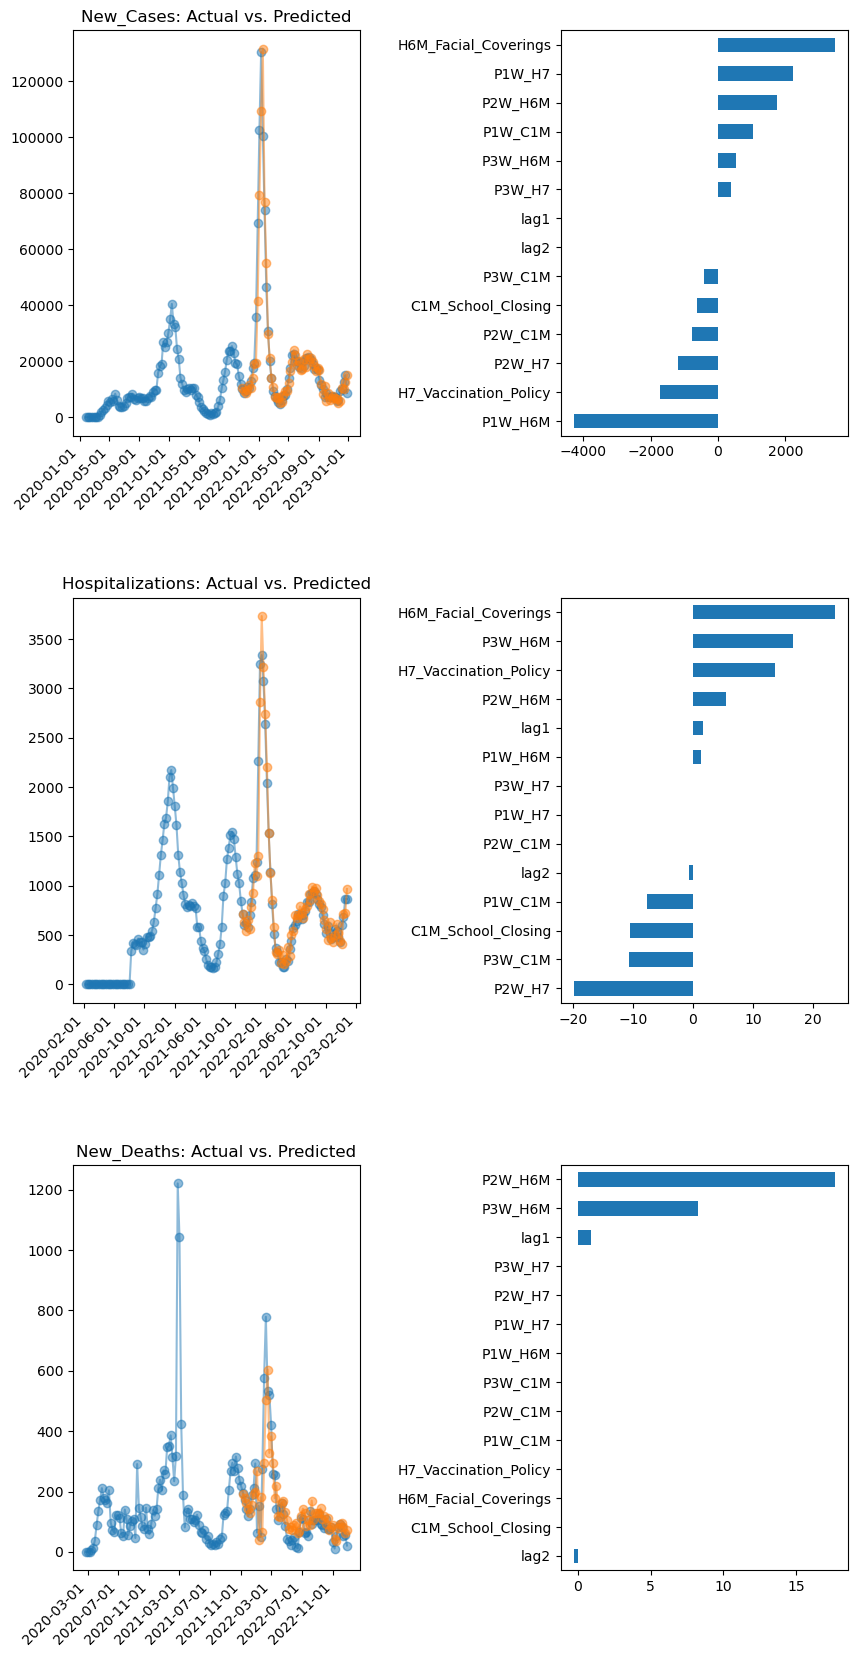

In [140]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

el_weekly_data = weekly_data.copy()
# Split data into features and target variable
predictors = ['lag1', 'lag2'] + pred_list
#print(predictors)


figure, axis = plt.subplots(nrows=len(column_list), ncols=2, figsize=(10, 20),width_ratios=[2, 2])
plt.subplots_adjust(wspace=0.7,hspace=0.4)
#figure.tight_layout(pad=5.0)
myFmt = mdates.DateFormatter('%Y-%m-%d')


for count,cname in enumerate(column_list):
    # Feature engineering: lagged variables
    el_weekly_data['lag1'] = el_weekly_data[cname].shift(1)
    el_weekly_data['lag2'] = el_weekly_data[cname].shift(2)
    
    # Drop NaN values resulting from lagged variables
    el_weekly_data = el_weekly_data.dropna()
    
    #generate X and y
    X = el_weekly_data[predictors]
    y = el_weekly_data[cname]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

    # Fit an ElasticNet regression mode
    alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.1, 1.0, 10.0, 100.0]
    ratios = [0.01, 0.1, 0.5, 0.7, 1] 

    enet_perf_df = pd.DataFrame(columns=['Column','Alpha','L1_Ratio', 'RMSE'])
    for alpha in alphas:
        for l1_ratio in ratios:
            elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
            elasticnet_model.fit(X_train, y_train)
            # Make predictions
            y_pred = elasticnet_model.predict(X_test)
            # Evaluate the model
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            enet_perf_df.loc[len(enet_perf_df.index)] = [cname, alpha, l1_ratio, rmse]
            #print('alphaf'Root Mean Squared Error: {rmse}')

    #print(enet_perf_df.sort_values('RMSE')[0:5])
    temp_alpha, temp_L1 = get_best_params(enet_perf_df)
    #print('new1', temp_alpha, 'new2', temp_L1)
    
    print('column', cname, 'temp_alpha', temp_alpha, 'temp_L1', temp_L1)
    final_enet_model = ElasticNet(alpha=temp_alpha, l1_ratio=temp_L1,max_iter=50000)
    final_enet_model.fit(X_train, y_train)
    # Make predictions
    y_pred = final_enet_model.predict(X_test)
    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    #enet_perf_df.loc[len(enet_perf_df.index)] = [alpha, l1_ratio, rmse]
    print('Final RMSE', rmse)
    alpha = 0.5
    y_plot = y_train.append(y_test)
    axis[count,0].plot(y_plot.index, y_plot, label='Actual', marker='o', alpha=alpha)
    axis[count,0].plot(X_test.index, y_pred, label='Predicted', marker='o', alpha=alpha)
    axis[count,0].set_title(cname + ': Actual vs. Predicted')
    axis[count,0].xaxis.set_major_formatter(myFmt)
    axis[count,0].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[count,0].set_xticks([], minor=True);
    for label in axis[count,0].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right') 
    importance=None
    importance = pd.Series(final_enet_model.coef_, index=X_train.columns).sort_values(ascending=True);
    #feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    importance.plot(kind='barh',ax = axis[count,1])


<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Run Models for Cases. Hospitlaizations, and Deaths with Policy Dummy Indicators</font><br><br>
    <b><font size="5">Generate Actual and Prediction Plots</font><br><br>
    </p>
</div>

column New_Cases temp_alpha 100.0 temp_L1 0.01
Final RMSE 7721.743027241236
column Hospitalizations temp_alpha 1.0 temp_L1 1.0
Final RMSE 164.39203493528507
column New_Deaths temp_alpha 100.0 temp_L1 1.0
Final RMSE 81.63430640416064


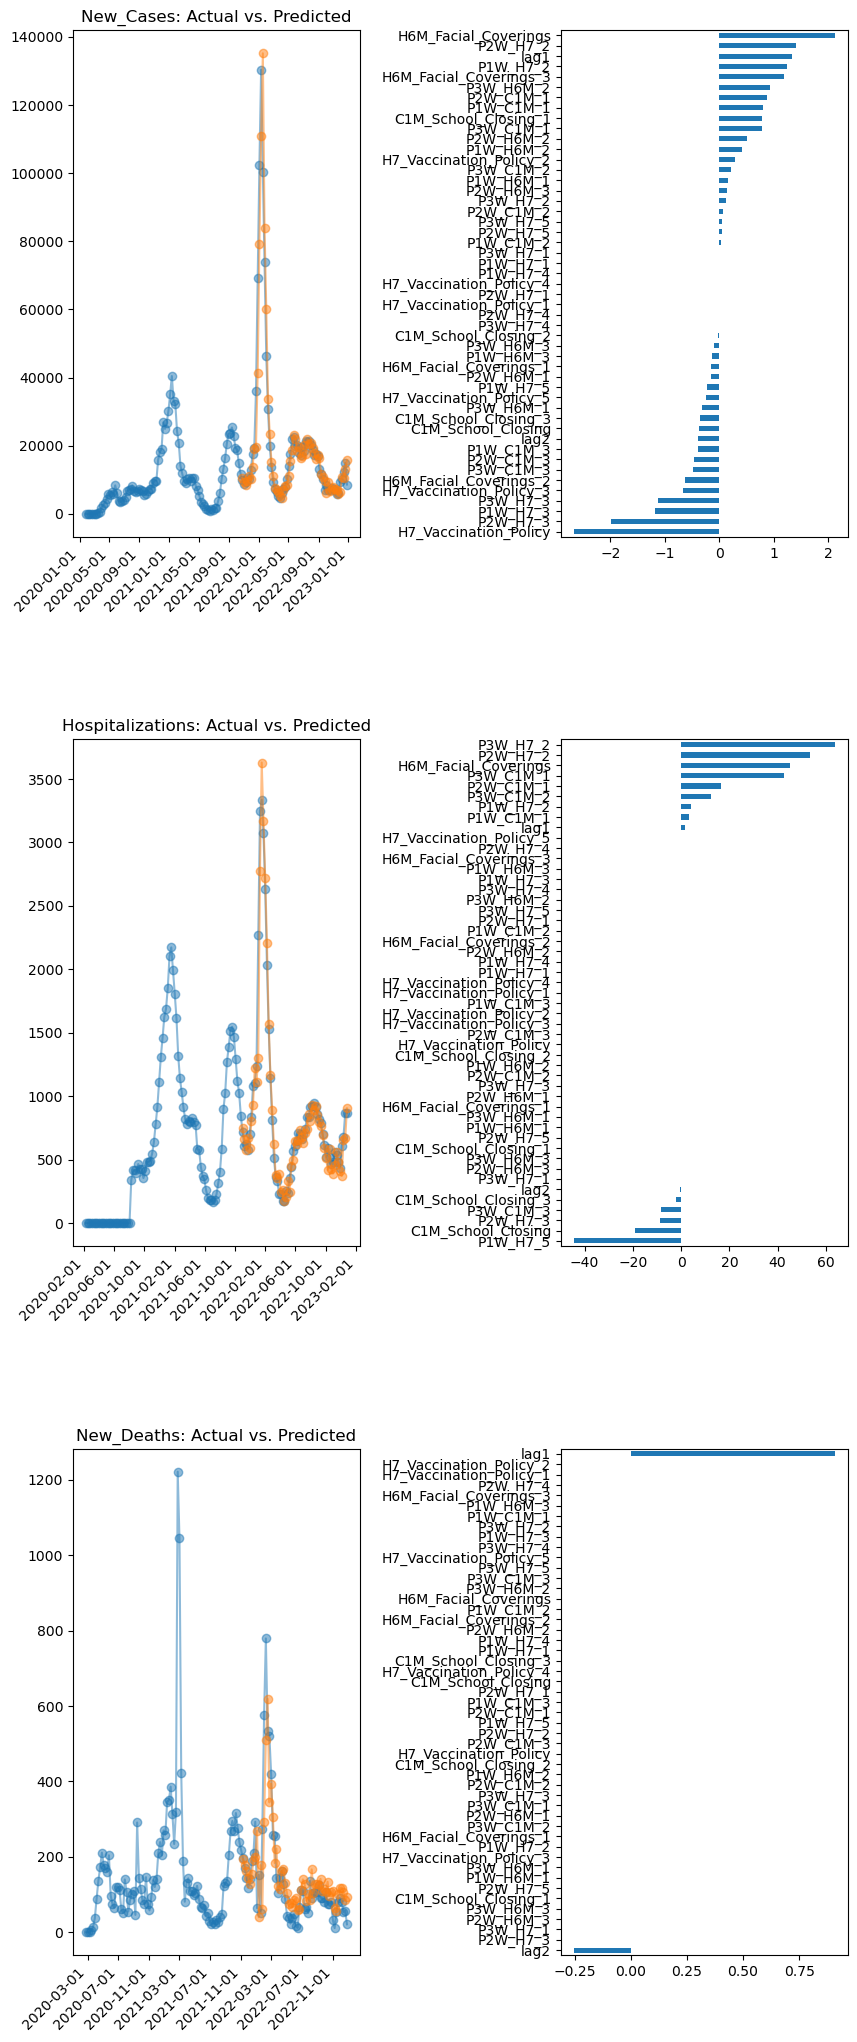

In [145]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

el_weekly_data = weekly_dummied.copy()
# Split data into features and target variable
predictors = ['lag1', 'lag2'] + pred_list2
#print(predictors)


figure, axis = plt.subplots(nrows=len(column_list), ncols=2, figsize=(10, 25),width_ratios=[2, 2])
plt.subplots_adjust(wspace=0.7,hspace=0.4)
#figure.tight_layout(pad=5.0)
myFmt = mdates.DateFormatter('%Y-%m-%d')


for count,cname in enumerate(column_list):
    # Feature engineering: lagged variables
    el_weekly_data['lag1'] = el_weekly_data[cname].shift(1)
    el_weekly_data['lag2'] = el_weekly_data[cname].shift(2)
    
    # Drop NaN values resulting from lagged variables
    el_weekly_data = el_weekly_data.dropna()
    
    #generate X and y
    X = el_weekly_data[predictors]
    y = el_weekly_data[cname]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

    # Fit an ElasticNet regression mode
    alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.1, 1.0, 10.0, 100.0]
    ratios = [0.01, 0.1, 0.5, 0.7, 1] 

    enet_perf_df = pd.DataFrame(columns=['Column','Alpha','L1_Ratio', 'RMSE'])
    for alpha in alphas:
        for l1_ratio in ratios:
            elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
            elasticnet_model.fit(X_train, y_train)
            # Make predictions
            y_pred = elasticnet_model.predict(X_test)
            # Evaluate the model
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            enet_perf_df.loc[len(enet_perf_df.index)] = [cname, alpha, l1_ratio, rmse]
            #print('alphaf'Root Mean Squared Error: {rmse}')

    #print(enet_perf_df.sort_values('RMSE')[0:5])
    temp_alpha, temp_L1 = get_best_params(enet_perf_df)
    #print('new1', temp_alpha, 'new2', temp_L1)
    
    print('column', cname, 'temp_alpha', temp_alpha, 'temp_L1', temp_L1)
    final_enet_model = ElasticNet(alpha=temp_alpha, l1_ratio=temp_L1,max_iter=50000)
    final_enet_model.fit(X_train, y_train)
    # Make predictions
    y_pred = final_enet_model.predict(X_test)
    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    #enet_perf_df.loc[len(enet_perf_df.index)] = [alpha, l1_ratio, rmse]
    print('Final RMSE', rmse)
    alpha = 0.5
    y_plot = y_train.append(y_test)
    axis[count,0].plot(y_plot.index, y_plot, label='Actual', marker='o', alpha=alpha)
    axis[count,0].plot(X_test.index, y_pred, label='Predicted', marker='o', alpha=alpha)
    axis[count,0].set_title(cname + ': Actual vs. Predicted')
    axis[count,0].xaxis.set_major_formatter(myFmt)
    axis[count,0].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axis[count,0].set_xticks([], minor=True);
    for label in axis[count,0].get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right') 
    importance=None
    importance = pd.Series(final_enet_model.coef_, index=X_train.columns).sort_values(ascending=True);
    #feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    importance.plot(kind='barh',ax = axis[count,1])


<body>
<div class="alert alert-block alert-info">
    <p>
    <b><font size="5">Best Performance Results from All Models</font><br><br>
    </p>
</div>

<!DOCTYPE html>
<html>
<head>
<style>
  table {
    margin: auto;
    width: 100%; /* Adjust the width as needed */
    font-size: 20px;
    border: 1px solid;
  }
  td { 
    font-size: 24px;
    text-align: justify;
    padding: 12px; /* Adding padding for better readability */
  }
  th
  {
    text-align: center;
    font-size: 20px;
  }
</style>

<table>
    <tr>
        <th> Response</th>
        <th> Algorithm </th>
        <th> Exog </th> 
        <th> RMSE </th>
        <th> Savings </th>
    </tr>
    <tr>
        <td>Hospitalizations</td>
        <td>Elasticnet</td>
        <td>All</td>
        <td>164.02</td>
        <td> 76% </td>
    </tr>
    <tr>
        <td>Hospitlaizations</td>
        <td>Samirax</td>
        <td>P3W_H6M_3</td>
        <td>683.885</td>
        <td></td>
    </tr>
    <tr>
        <td>Hospitalizations</td>
        <td>Samirax</td>
        <td>P2W_H7_5</td>
        <td>691.944</td>
        <td></td>
    </tr>
    <tr>
        <td>Hospitalizations</td>
        <td>Samirax</td>
        <td>None</td>
        <td>703.703</td>
        <td></td>
    </tr>
    <tr>
        <td>New Cases</td>
        <td>Elasticnet</td>
        <td>All</td>
        <td>7,296.88</td>
        <td> 68% </td>
    </tr>
    <tr>
        <td>New Cases</td>
        <td>Samirax</td>
        <td>None</td>
        <td>22,865.274</td>
        <td></td>
    </tr>
    <tr>
        <td>New Cases</td>
        <td>Samirax</td>
        <td>C1M_School_Closoing_2</td>
        <td>22,930.647</td>
        <td></td>
    </tr>
    <tr>
        <td>New Deaths</td>
        <td>Elasticnet</td>
        <td>All</td>
        <td>81.17</td>
        <td> 38% </td>
    </tr>
    <tr>
        <td>New Deaths</td>
        <td>Samirax</td>
        <td>H6M_Facial_Coverings</td>
        <td>131.529</td>
        <td></td>
    </tr>
    <tr>
        <td>New Deaths</td>
        <td>Samirax</td>
        <td>None</td>
        <td>135.093</td>
        <td></td>
    </tr>
</table>